In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"zomato_rating.csv",encoding='latin-1') 
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
29228,https://www.zomato.com/bangalore/drava-koraman...,"104, 3rd Floor, 1st Main, 5th Block, Jatti Bui...",Drava,No,Yes,4.3 /5,114,080 49653135,Koramangala 5th Block,Lounge,"Cocktails, Veg Burger, Tikka, Beer, Pizza, Bur...","Pizza, Continental, North Indian, Asian","1,500","[('Rated 3.0', ""RATED\n The newly opened PUB ...",[],Drinks & nightlife,Koramangala 4th Block
37170,https://www.zomato.com/bangalore/the-cake-lair...,"2nd Main, Tavarekere Extension, Chocolate fact...",The Cake Lair,Yes,No,3.4 /5,10,+91 9526610662\n+91 9031373137,BTM,Quick Bites,NaN,"Bakery, Fast Food, Beverages",600,"[('Rated 5.0', 'RATED\n cake was so nice')]","['Chocolate Milkshake with Ice Cream', 'Chicke...",Dine-out,Koramangala 7th Block
15253,https://www.zomato.com/bangalore/little-paramo...,"28, 8th Cross, Vasanth Nagar, Bangalore",Little Paramount Restaurants,No,No,3.6/5,32,080 22384080\r\n+91 9986002500,Vasanth Nagar,Quick Bites,NaN,"Mughlai, North Indian",400,"[('Rated 5.0', ""RATED\n Nice place with good ...",[],Delivery,Frazer Town
11373,https://www.zomato.com/bangalore/slv-kabab-cen...,"288, NS Palya, Bannerghatta Road, Bangalore",SLV Kabab Centre,No,No,3.2/5,4,+91 9900229848\r\n+91 9591081253,Bannerghatta Road,Quick Bites,NaN,"Biryani, Fast Food",100,[],[],Dine-out,BTM
39659,https://www.zomato.com/bangalore/sri-ganesh-fr...,"9/53, Near Kanti Sweets, 5th Main Road, Gangan...",Sri Ganesh Fruit Juice Centre,Yes,No,3.2 /5,8,+91 9845260875,RT Nagar,Beverage Shop,NaN,Juices,100,"[('Rated 5.0', 'RATED\n Best place for health...","['Kiwi Milkshake', 'Lime Juice', 'Pineapple Ju...",Delivery,Malleshwaram


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<h3>Preprocessing rate column</h3>

In [6]:
df['rate'].sample(10)

32720    2.8 /5
51713       NaN
3668      3.8/5
19245       NaN
14811     2.4/5
23377     3.6/5
25240     4.0/5
7387      3.8/5
5705        NaN
8106      3.2/5
Name: rate, dtype: object

In [7]:
def process(x):
    try:
        return float(x[:3])
    except :
        #some values are string like'NEW'
        return np.nan

In [8]:
df['rate'] = df['rate'].apply(lambda x : process(x))

In [9]:
df.rate.isna().sum()

10052

In [10]:
df = df[df['rate'].notna()]
print(df.rate.isna().sum())

0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          41665 non-null  object 
 1   address                      41665 non-null  object 
 2   name                         41665 non-null  object 
 3   online_order                 41665 non-null  object 
 4   book_table                   41665 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        41665 non-null  int64  
 7   phone                        40851 non-null  object 
 8   location                     41665 non-null  object 
 9   rest_type                    41516 non-null  object 
 10  dish_liked                   23462 non-null  object 
 11  cuisines                     41654 non-null  object 
 12  approx_cost(for two people)  41418 non-null  object 
 13  reviews_list    

In [12]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

<AxesSubplot:xlabel='rate', ylabel='Count'>

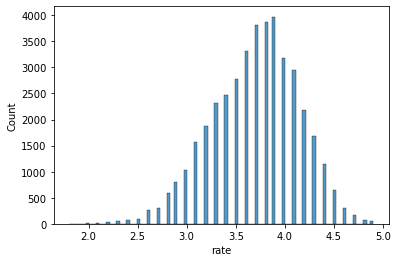

In [13]:
sns.histplot(x='rate',data=df)

<AxesSubplot:xlabel='rate', ylabel='Density'>

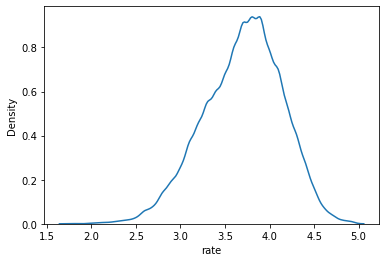

In [14]:
sns.kdeplot(x='rate',data=df)

In [15]:
df['rate'].skew()

-0.3286007981782886

<h3>Removing unwanted columns</h3>

In [16]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [17]:
df.menu_item.value_counts().reset_index().head()

,index,menu_item
0,[],30700
1,"['Butter Chicken Pizza', 'Bombay Veggie Burger...",11
2,"['Students Veg Combo', 'Office Veg Combo', 'St...",9
3,"['Chicken Cheese Burger', 'Chicken Billys BIg ...",9
4,"['Chicken 65', 'Chicken Chilly', 'Chicken Lemo...",8


In [18]:
(df.isna().sum()/df.shape[0])*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                            0.000000
votes                           0.000000
phone                           1.953678
location                        0.000000
rest_type                       0.357614
dish_liked                     43.688948
cuisines                        0.026401
approx_cost(for two people)     0.592824
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [19]:
drop_col=['url','phone','menu_item','address','reviews_list','dish_liked']
df.drop(columns=drop_col,inplace=True)

In [20]:
df.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
17816,Utse Kitchen,Yes,No,4.2,171,Commercial Street,Casual Dining,"Nepalese, Tibetan, Momos",800,Delivery,Indiranagar


In [21]:
df.iloc[df.index == 38535]['name'].values

array(['Le ChÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©ri'],
      dtype=object)

In [22]:
df.name.unique().shape

(6649,)

In [23]:
def process_name(x):
    encode  = x.encode("ascii", "ignore")
    decode = encode.decode()
    return decode

In [24]:
df['name'] = df['name'].apply(lambda x:process_name(x))

In [25]:
df.iloc[df.index == 38535]['name'].values

array(['Le Chri'], dtype=object)

In [26]:
df.name.unique().shape

(6621,)

<h3>Mapping string to numerics values</h3>

In [27]:
df['online_order'].value_counts()

Yes    27206
No     14459
Name: online_order, dtype: int64

In [28]:
df['book_table'].value_counts()

No     35361
Yes     6304
Name: book_table, dtype: int64

In [29]:
df['online_order'] = df['online_order'].replace('Yes',1)
df['book_table'] = df['book_table'].replace('Yes',1)
df['online_order'] = df['online_order'].replace('No',0)
df['book_table'] = df['book_table'].replace('No',0)

In [30]:
df['online_order'] = df['online_order'].astype('int32')
df['book_table'] = df['book_table'].astype('int32')

In [31]:
df.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
15821,Cafe Mondo,1,0,3.6,484,HSR,"Cafe, Casual Dining","Cafe, Italian, Pizza, Chinese",700,Cafes,HSR


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41665 non-null  object 
 1   online_order                 41665 non-null  int32  
 2   book_table                   41665 non-null  int32  
 3   rate                         41665 non-null  float64
 4   votes                        41665 non-null  int64  
 5   location                     41665 non-null  object 
 6   rest_type                    41516 non-null  object 
 7   cuisines                     41654 non-null  object 
 8   approx_cost(for two people)  41418 non-null  object 
 9   listed_in(type)              41665 non-null  object 
 10  listed_in(city)              41665 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 3.5+ MB


<h3>Preprocessing cuisines,cost,rest_type,city and location columns</h3>

In [33]:
col_rename={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'}
df.rename(columns=col_rename,inplace=True)

In [34]:
df.cuisines.head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

In [35]:
df['cuisines'] = df['cuisines'].str.replace(' ','')
df['cuisines'] = df['cuisines'].str.replace(',',' ')
df.cuisines.head()

0    NorthIndian Mughlai Chinese
1       Chinese NorthIndian Thai
2           Cafe Mexican Italian
3        SouthIndian NorthIndian
4         NorthIndian Rajasthani
Name: cuisines, dtype: object

In [36]:
df.rest_type.head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [37]:
df['rest_type'] = df['rest_type'].str.replace(' ','')
df['rest_type'] = df['rest_type'].str.replace(',',' ')
df.rest_type.head()

0         CasualDining
1         CasualDining
2    Cafe CasualDining
3           QuickBites
4         CasualDining
Name: rest_type, dtype: object

In [38]:
df.cost.sample(4)

7806     400
32521    150
12725    650
48466    200
Name: cost, dtype: object

In [39]:
df['cost'] = df['cost'].str.replace(',','')
df['cost'] = df['cost'].astype('float32')

In [40]:
df['location'] = df['location'].str.replace(' ','')
df['city'] = df['city'].str.replace(' ','')
df['location'] = df['location'].str.lower()
df['city'] = df['city'].str.lower()

In [41]:
(df[df['location'] == df['city']].shape[0]/df.shape[0])*100

30.519620784831393

In [42]:
x = df.location.tolist()
y = df.city.tolist()
len(x),len(y)

(41665, 41665)

In [43]:
l=[]
for i in range(len(x)):
    if (x[i] in y[i]) or (y[i] in x[i]):
        l.append(x[i])
    else:
        l.append(x[i] +' '+ y[i])
        
print(len(l))

41665


In [44]:
df['city_location'] = l

In [45]:
df.drop(columns=['location','city'],inplace=True)

In [46]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city_location
0,Jalsa,1,1,4.1,775,CasualDining,NorthIndian Mughlai Chinese,800.0,Buffet,banashankari
1,Spice Elephant,1,0,4.1,787,CasualDining,Chinese NorthIndian Thai,800.0,Buffet,banashankari
2,San Churro Cafe,1,0,3.8,918,Cafe CasualDining,Cafe Mexican Italian,800.0,Buffet,banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,QuickBites,SouthIndian NorthIndian,300.0,Buffet,banashankari
4,Grand Village,0,0,3.8,166,CasualDining,NorthIndian Rajasthani,600.0,Buffet,basavanagudi banashankari


<h3>Dropping duplicates and nan values

In [47]:
df.duplicated().sum()

83

In [48]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [49]:
(df.isna().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate             0.000000
votes            0.000000
rest_type        0.358328
cuisines         0.026454
cost             0.589197
type             0.000000
city_location    0.000000
dtype: float64

In [50]:
df.shape

(41582, 10)

In [51]:
df.dropna(inplace=True)
df.isna().sum()

name             0
online_order     0
book_table       0
rate             0
votes            0
rest_type        0
cuisines         0
cost             0
type             0
city_location    0
dtype: int64

In [52]:
df.shape

(41182, 10)

In [53]:
df.sample(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city_location
50336,Best In Klass,1,0,3.2,47,QuickBites,SouthIndian,200.0,Delivery,whitefield
19911,The little Kitchen,1,0,3.4,6,QuickBites,Chinese NorthIndian,300.0,Delivery,jpnagar jayanagar
4963,The Black Pearl,0,1,4.8,7023,CasualDining Bar,NorthIndian European Mediterranean BBQ,1500.0,Pubs and bars,marathahalli bellandur
3539,Pure & Natural,1,0,3.9,211,CasualDining,FastFood Continental Beverages Salad HealthyFood,500.0,Dine-out,jayanagar basavanagudi
44153,Fish Corner,1,0,3.7,118,QuickBites,NorthIndian Chinese Seafood,400.0,Delivery,yeshwantpur newbelroad


In [54]:
df.to_csv('zomato_rating2.csv',index=False)

<h3>Analyzing categorical columns

In [3]:
df=pd.read_csv(r"zomato_rating2.csv") 
df.sample(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city_location
37587,3G's - Gulp & Groove,1,1,4.1,664,Bar CasualDining,FingerFood Continental Chinese,1100.0,Drinks & nightlife,malleshwaram rajajinagar
13277,Calvin's,1,0,3.8,22,DessertParlor QuickBites,Desserts,800.0,Desserts,hsr
30502,Bowring Kulfi,0,0,4.0,100,DessertParlor,IceCream Desserts,150.0,Desserts,residencyroad lavelleroad
18539,Dreamcatcher,1,0,3.9,50,Cafe,Cafe,600.0,Dine-out,bannerghattaroad jpnagar
31868,Toscano,1,1,4.3,1099,CasualDining,Italian Salad Mediterranean,1500.0,Dine-out,malleshwaram


In [4]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'cost', 'type', 'city_location'],
      dtype='object')

<h5>Analyzing 'rest_type' variable

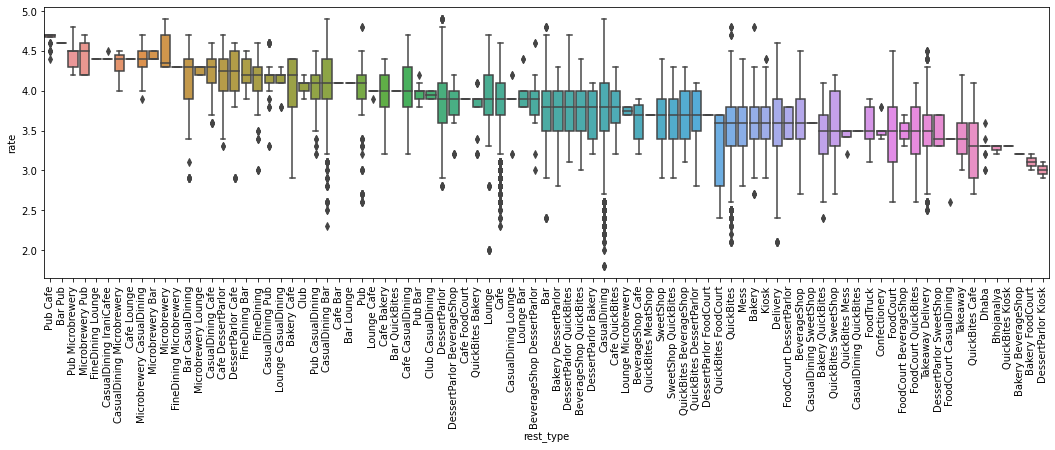

In [5]:
temp = df.groupby(['rest_type'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='rest_type',data=pd.merge(temp,df,on='rest_type'))
plt.xticks(rotation=90)
plt.show()

In [6]:
temp.head()

,rest_type,rate_median
70,Pub Cafe,4.7
9,Bar Pub,4.6
72,Pub Microbrewery,4.5
67,Microbrewery Pub,4.5
48,FineDining Lounge,4.4


In [7]:
unique_rest_type = df['rest_type'].value_counts()
print('Number of Unique rest_type :', unique_rest_type.shape[0])
print('% of data having unique rest_type :',unique_rest_type.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 rest_type that occured most')
print(unique_rest_type.head(10))

Number of Unique rest_type : 87
% of data having unique rest_type : 0.21125734544218347
***************************************************
Top 10 rest_type that occured most
QuickBites           13861
CasualDining          9597
Cafe                  3365
DessertParlor         1848
Delivery              1658
Takeaway Delivery     1276
CasualDining Bar      1087
Bakery                 704
Bar                    640
BeverageShop           638
Name: rest_type, dtype: int64


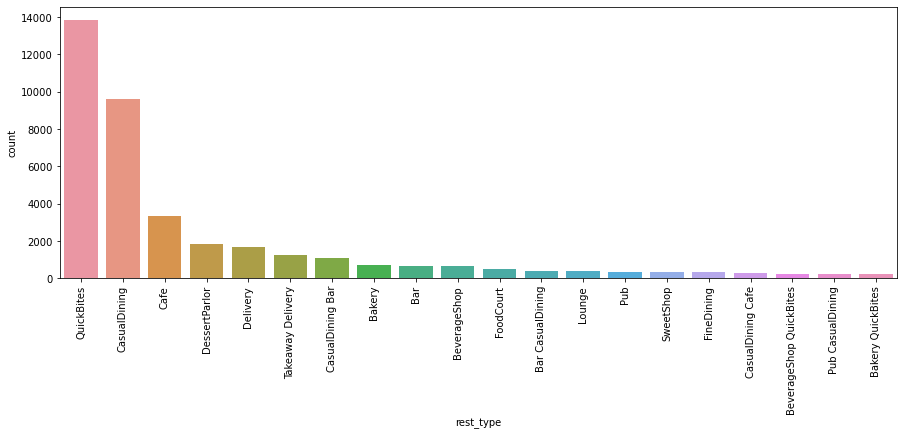

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='rest_type', order=unique_rest_type.index.tolist()[:20],data=df)
plt.xticks(rotation=90)
plt.show()

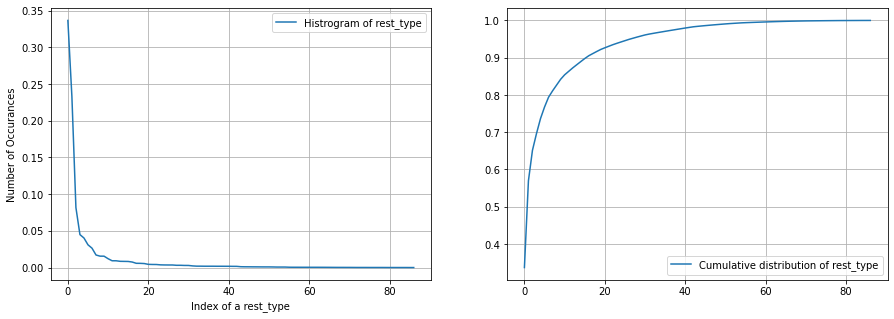

In [9]:
s = sum(unique_rest_type.values);
h = unique_rest_type.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of rest_type")
plt.xlabel('Index of a rest_type')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of rest_type')
plt.grid()
plt.legend()
plt.show()

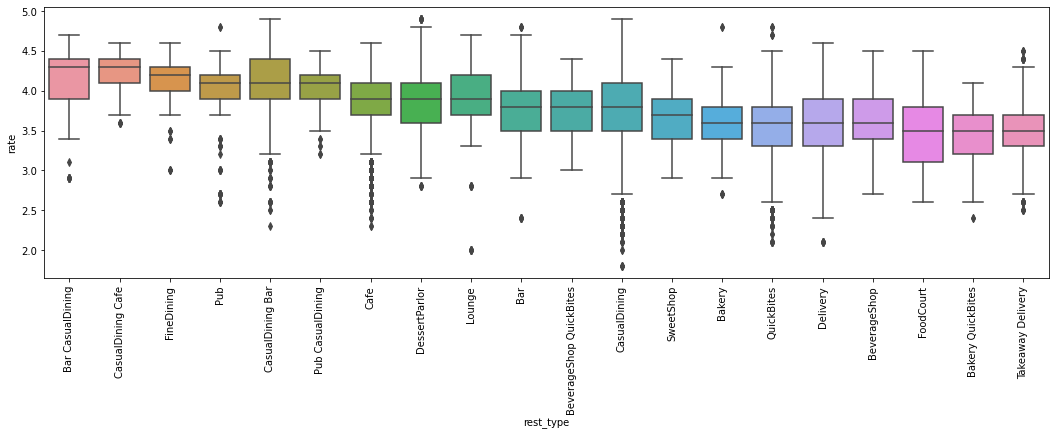

In [10]:
top = unique_rest_type.index[:20].tolist()
data = df[df['rest_type'].isin(top)]
temp = data.groupby(['rest_type'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='rest_type',data=pd.merge(temp,data,on='rest_type'))
plt.xticks(rotation=90)
plt.show()

In [11]:
temp.head()

,rest_type,rate_median
3,Bar CasualDining,4.3
9,CasualDining Cafe,4.3
12,FineDining,4.2
15,Pub,4.1
8,CasualDining Bar,4.1


<h5>Analyzing 'cuisines' variable

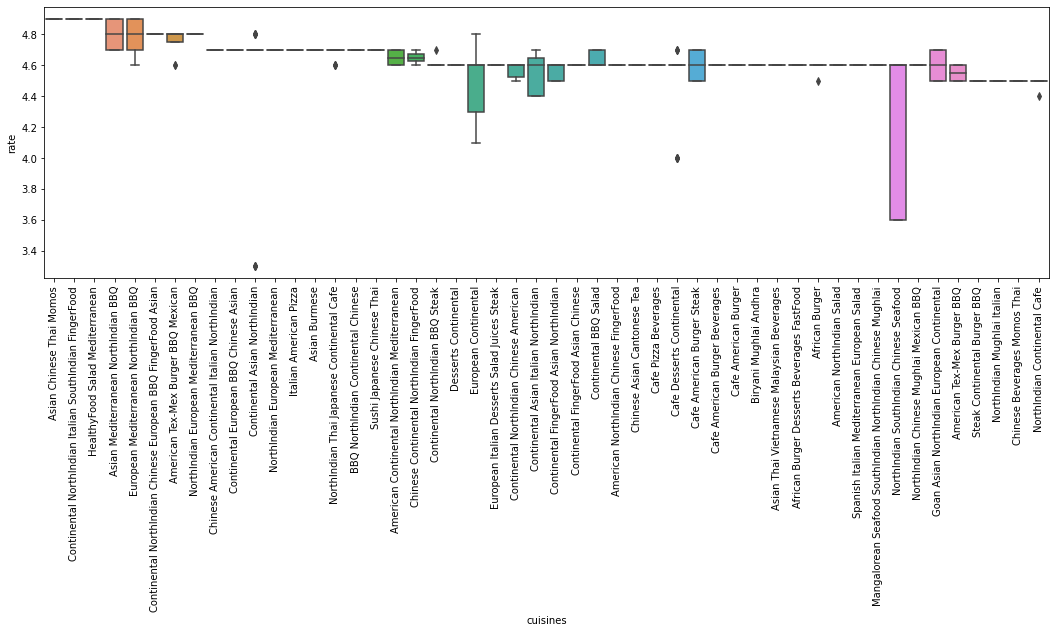

In [12]:
temp = df.groupby(['cuisines'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='cuisines',data=pd.merge(temp,df,on='cuisines'),order=temp['cuisines'].unique().tolist()[:50])
plt.xticks(rotation=90)
plt.show()

In [13]:
temp.head()

,cuisines,rate_median
172,Asian Chinese Thai Momos,4.9
1001,Continental NorthIndian Italian SouthIndian Fi...,4.9
1274,HealthyFood Salad Mediterranean,4.9
192,Asian Mediterranean NorthIndian BBQ,4.8
1087,European Mediterranean NorthIndian BBQ,4.8


In [14]:
unique_cuisines = df['cuisines'].value_counts()
print('Number of Unique cuisines :', unique_cuisines.shape[0])
print('% of data having unique cuisines :',unique_cuisines.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 cuisines that occured most')
print(unique_cuisines.head(10))

Number of Unique cuisines : 2367
% of data having unique cuisines : 5.747656743237337
***************************************************
Top 10 cuisines that occured most
NorthIndian                        2107
NorthIndian Chinese                1947
SouthIndian                        1231
Cafe                                620
Bakery Desserts                     613
Biryani                             600
SouthIndian NorthIndian Chinese     561
Desserts                            545
FastFood                            512
Chinese                             409
Name: cuisines, dtype: int64


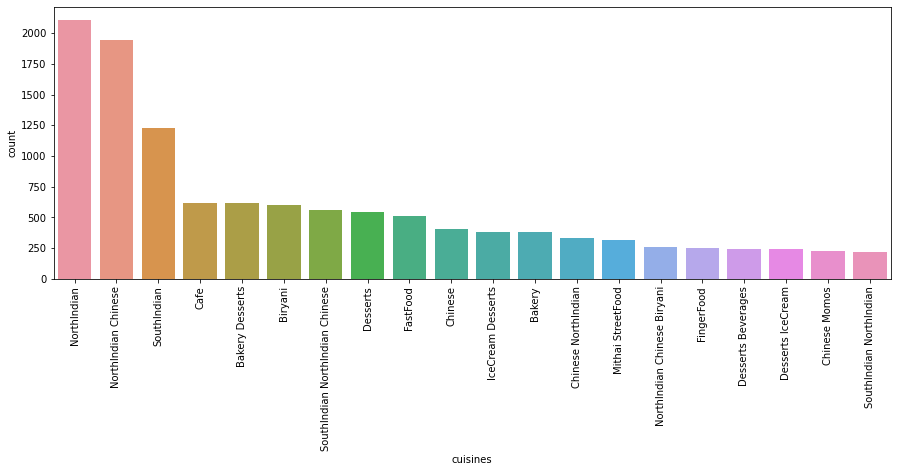

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='cuisines', order=unique_cuisines.index.tolist()[:20],data=df)
plt.xticks(rotation=90)
plt.show()

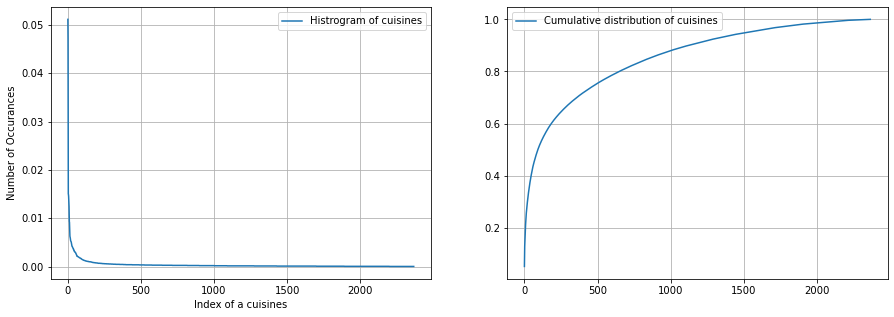

In [62]:
s = sum(unique_cuisines.values);
h = unique_cuisines.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of cuisines")
plt.xlabel('Index of a cuisines')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of cuisines')
plt.grid()
plt.legend()
plt.show()

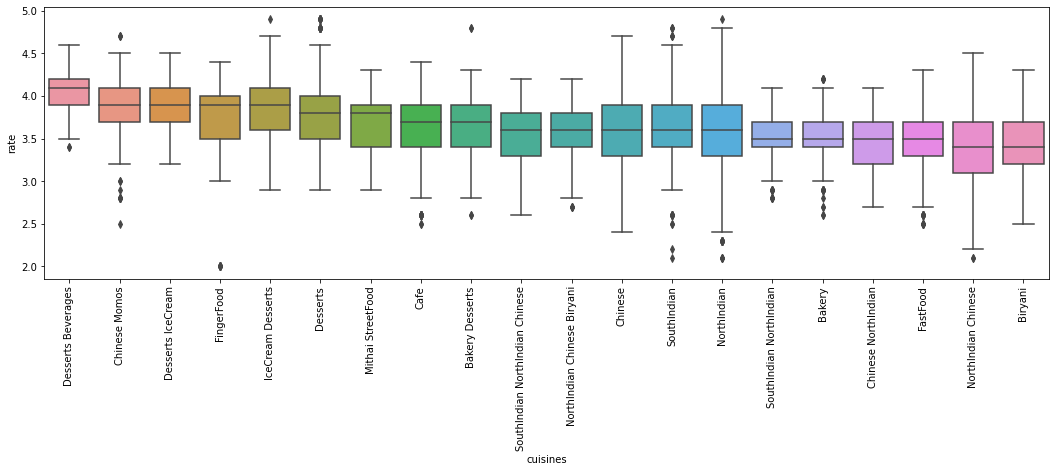

In [17]:
top = unique_cuisines.index[:20].tolist()
data = df[df['cuisines'].isin(top)]
temp = data.groupby(['cuisines'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='cuisines',data=pd.merge(temp,data,on='cuisines'))
plt.xticks(rotation=90)
plt.show()

In [18]:
temp.head()

,cuisines,rate_median
8,Desserts Beverages,4.1
5,Chinese Momos,3.9
9,Desserts IceCream,3.9
11,FingerFood,3.9
12,IceCream Desserts,3.9


<h5>Analyzing 'type' variable

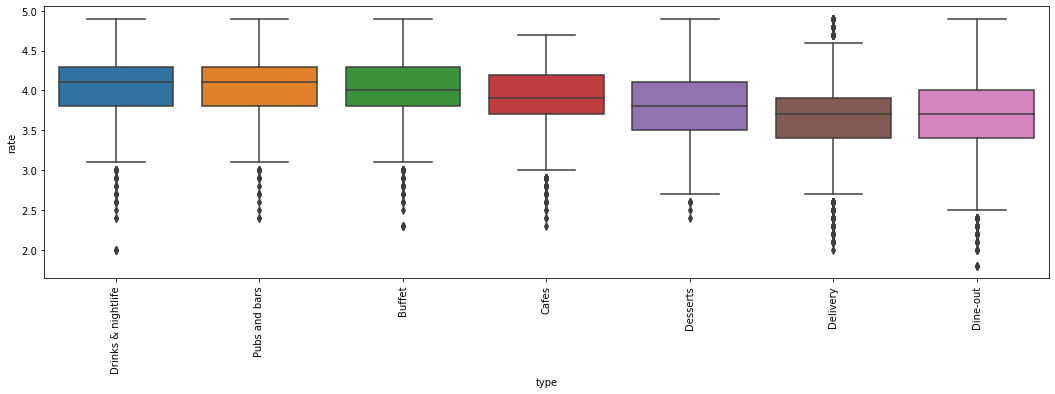

In [21]:
temp = df.groupby(['type'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='type',data=pd.merge(temp,df,on='type'))
plt.xticks(rotation=90)
plt.show()

In [22]:
temp.head()

,type,rate_median
5,Drinks & nightlife,4.1
6,Pubs and bars,4.1
0,Buffet,4.0
1,Cafes,3.9
3,Desserts,3.8


In [25]:
unique_type = df['type'].value_counts()
print('Number of Unique type :', unique_type.shape[0])
print('% of data having unique rest_type :',unique_type.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 type that occured most')
print(unique_type.head(10))

Number of Unique type : 7
% of data having unique rest_type : 0.016997717449371084
***************************************************
Top 10 type that occured most
Delivery              20398
Dine-out              14050
Desserts               2709
Cafes                  1511
Drinks & nightlife     1038
Buffet                  846
Pubs and bars           630
Name: type, dtype: int64


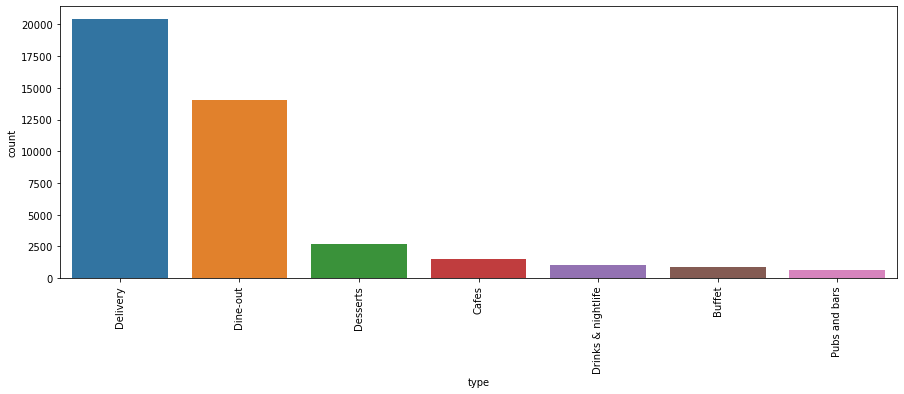

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='type', order=unique_type.index.tolist()[:20],data=df)
plt.xticks(rotation=90)
plt.show()

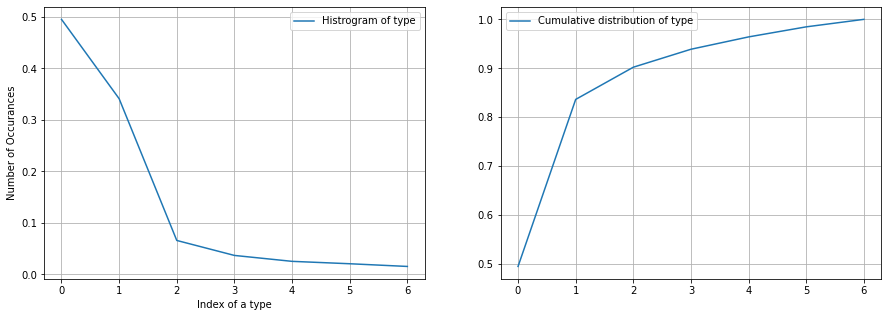

In [26]:
s = sum(unique_type.values);
h = unique_type.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of type")
plt.xlabel('Index of a type')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of type')
plt.grid()
plt.legend()
plt.show()

<h5>Analyzing 'name' variable

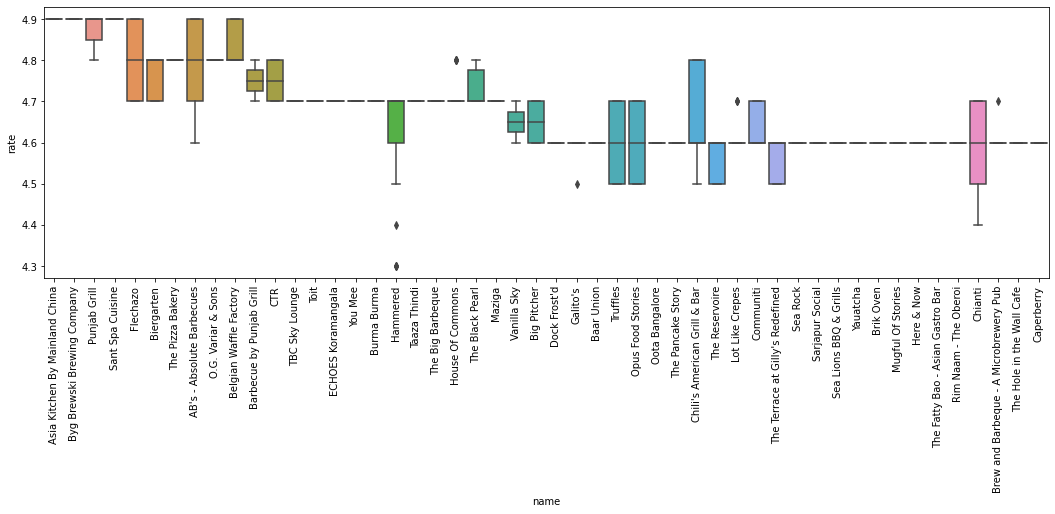

In [31]:
temp = df.groupby(['name'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='name',data=pd.merge(temp,df,on='name'),order=temp['name'].unique().tolist()[:50])
plt.xticks(rotation=90)
plt.show()

In [32]:
temp.head()

,name,rate_median
425,Asia Kitchen By Mainland China,4.9
949,Byg Brewski Brewing Company,4.9
4457,Punjab Grill,4.9
4898,Sant Spa Cuisine,4.9
1983,Flechazo,4.8


In [34]:
unique_name = df['name'].value_counts()
print('Number of Unique name :', unique_name.shape[0])
print('% of data having unique name :',unique_name.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 name that occured most')
print(unique_name.head(10))

Number of Unique name : 6574
% of data having unique name : 15.963284930309356
***************************************************
Top 10 name that occured most
Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Five Star Chicken    68
Kanti Sweets         68
Just Bake            67
Baskin Robbins       62
Pizza Hut            60
Petoo                60
KFC                  60
Name: name, dtype: int64


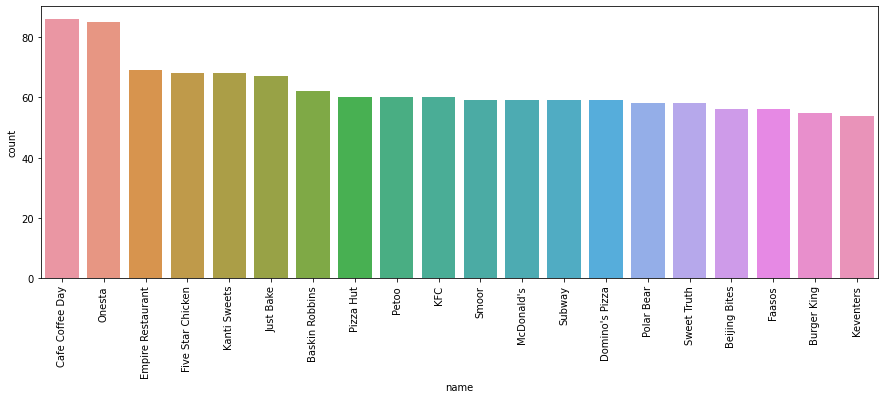

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='name', order=unique_name.index.tolist()[:20],data=df)
plt.xticks(rotation=90)
plt.show()

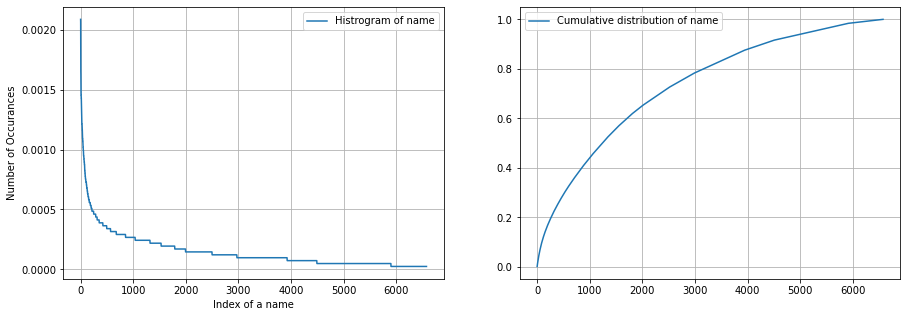

In [70]:
s = sum(unique_name.values);
h = unique_name.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of name")
plt.xlabel('Index of a name')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of name')
plt.grid()
plt.legend()
plt.show()

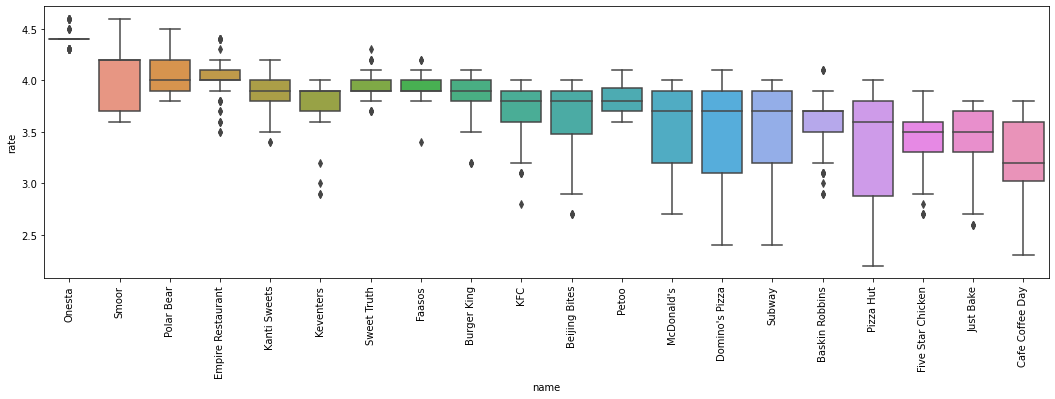

In [38]:
top = unique_name.index[:20].tolist()
data = df[df['name'].isin(top)]
temp = data.groupby(['name'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='name',data=pd.merge(temp,data,on='name'))
plt.xticks(rotation=90)
plt.show()

In [39]:
temp.head()

,name,rate_median
13,Onesta,4.4
17,Smoor,4.2
16,Polar Bear,4.0
5,Empire Restaurant,4.0
10,Kanti Sweets,3.9


<h5>Analyzing 'city_location' variable

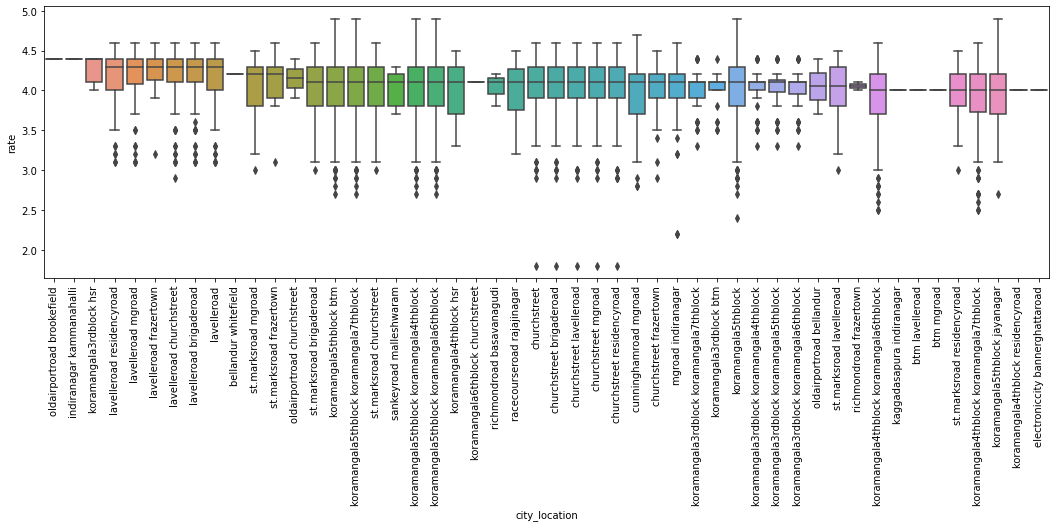

In [40]:
temp = df.groupby(['city_location'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='city_location',data=pd.merge(temp,df,on='city_location'),order=temp['city_location'].unique().tolist()[:50])
plt.xticks(rotation=90)
plt.show()

In [41]:
temp.head()

,city_location,rate_median
408,oldairportroad brookefield,4.4
190,indiranagar kammanahalli,4.4
280,koramangala3rdblock hsr,4.4
364,lavelleroad residencyroad,4.3
363,lavelleroad mgroad,4.3


In [42]:
unique_city_location = df['city_location'].value_counts()
print('Number of Unique city_location :', unique_city_location.shape[0])
print('% of data having unique city_location :',unique_city_location.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 city_location that occured most')
print(unique_city_location.head(10))

Number of Unique city_location : 577
% of data having unique city_location : 1.4010975668981593
***************************************************
Top 10 city_location that occured most
whitefield                 1037
hsr                         884
marathahalli                869
btm                         827
indiranagar                 825
electroniccity              813
jpnagar                     610
btm koramangala7thblock     607
bannerghattaroad            570
btm koramangala5thblock     559
Name: city_location, dtype: int64


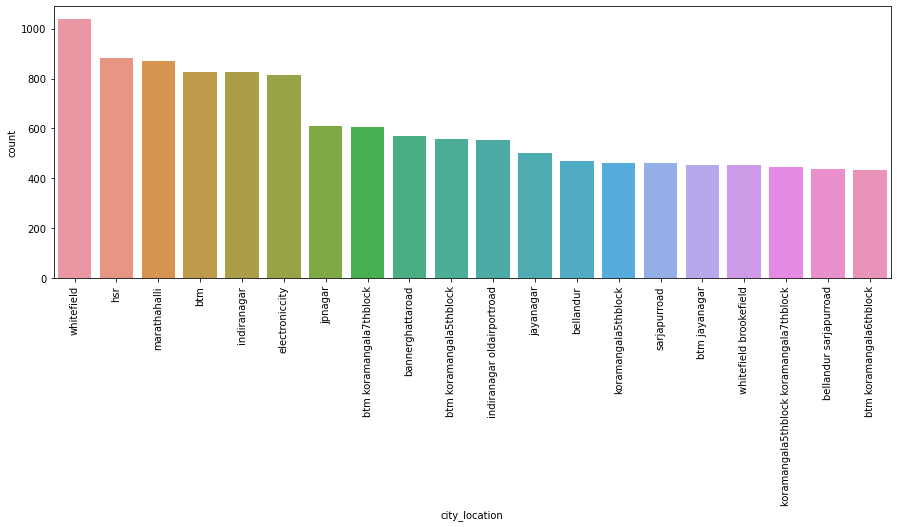

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='city_location', order=unique_city_location.index.tolist()[:20],data=df)
plt.xticks(rotation=90)
plt.show()

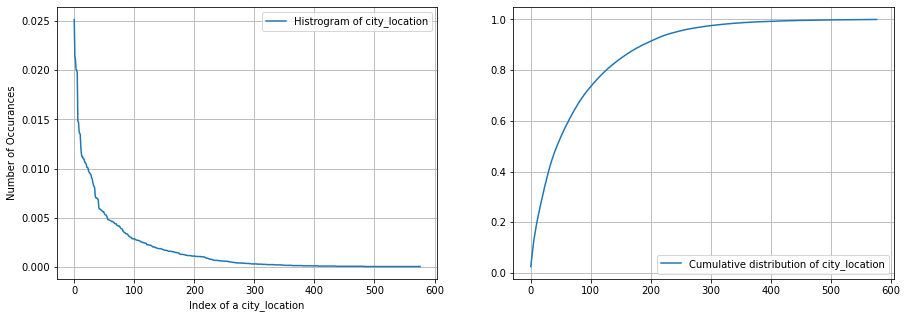

In [44]:
s = sum(unique_city_location.values);
h = unique_city_location.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of city_location")
plt.xlabel('Index of a city_location')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of city_location')
plt.grid()
plt.legend()
plt.show()

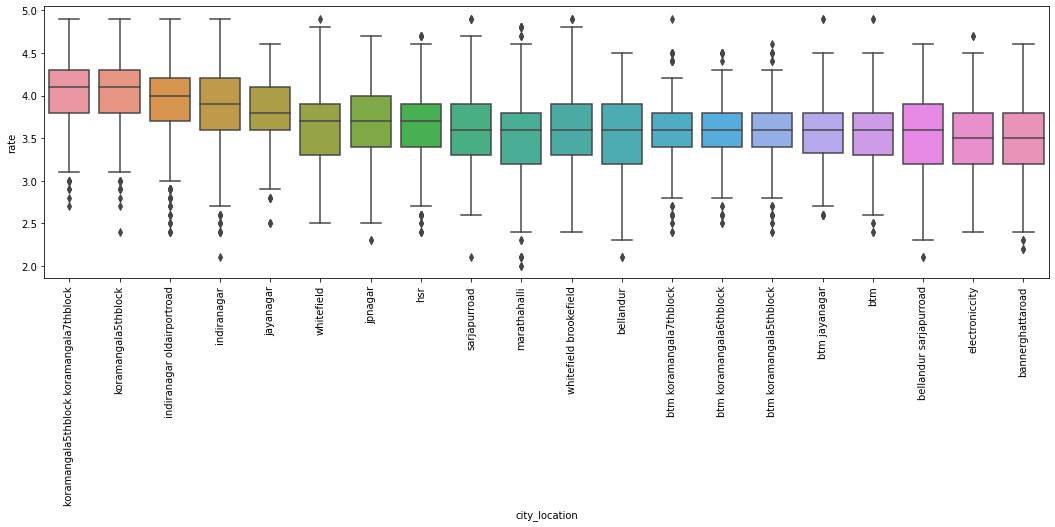

In [45]:
top = unique_city_location.index[:20].tolist()
data = df[df['city_location'].isin(top)]
temp = data.groupby(['city_location'])['rate'].median().reset_index().sort_values(by='rate',ascending=False)
temp.rename(columns={'rate':'rate_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='rate',x='city_location',data=pd.merge(temp,data,on='city_location'))
plt.xticks(rotation=90)
plt.show()

In [46]:
temp.head()

,city_location,rate_median
15,koramangala5thblock koramangala7thblock,4.1
14,koramangala5thblock,4.1
11,indiranagar oldairportroad,4.0
10,indiranagar,3.9
12,jayanagar,3.8


<h5>Analyzing 'book_table' and 'online_order' variable

In [70]:
df['book_table'].value_counts()

0    34907
1     6275
Name: book_table, dtype: int64

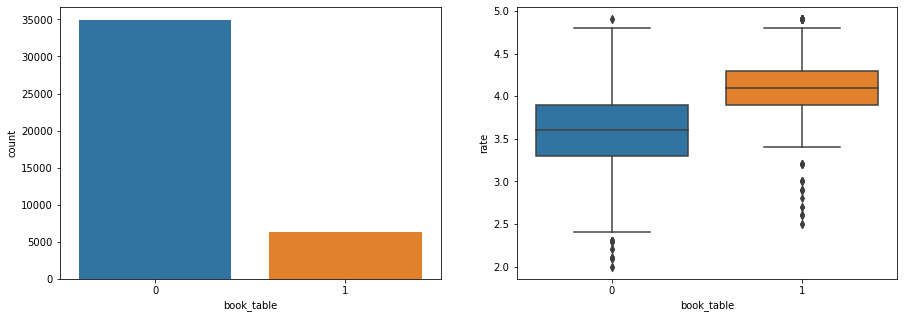

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='book_table',data=df)

plt.subplot(1, 2, 2)
sns.boxplot(y='rate',x='book_table',data=data)
plt.show()

In [66]:
df.groupby(['book_table'])['rate'].median()

book_table
0    3.7
1    4.2
Name: rate, dtype: float64

In [71]:
df['online_order'].value_counts()

1    27040
0    14142
Name: online_order, dtype: int64

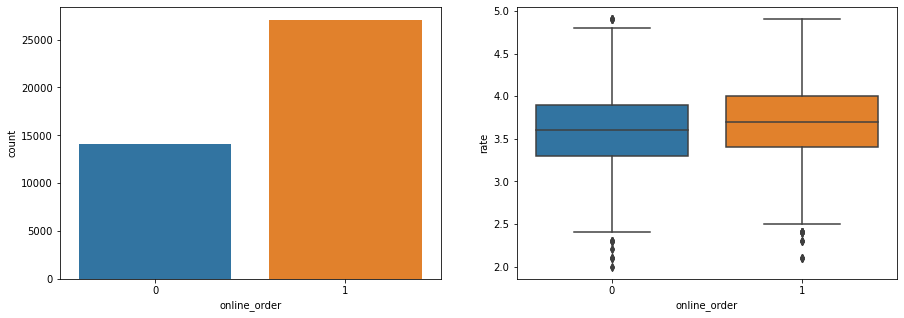

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='online_order',data=df)

plt.subplot(1, 2, 2)
sns.boxplot(y='rate',x='online_order',data=data)
plt.show()

In [67]:
df.groupby(['online_order'])['rate'].median()

online_order
0    3.7
1    3.8
Name: rate, dtype: float64

<h5>Analyzing 'votes' and 'cost' variable

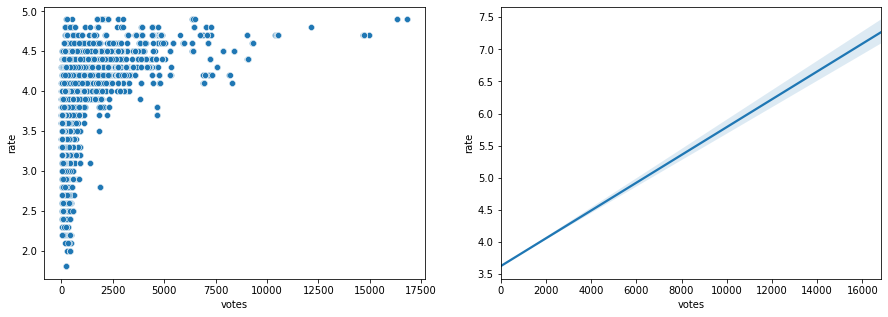

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="votes", y="rate", data=df)

plt.subplot(1, 2, 2)
sns.regplot(x="votes", y="rate", data=df,scatter=False)
plt.show()

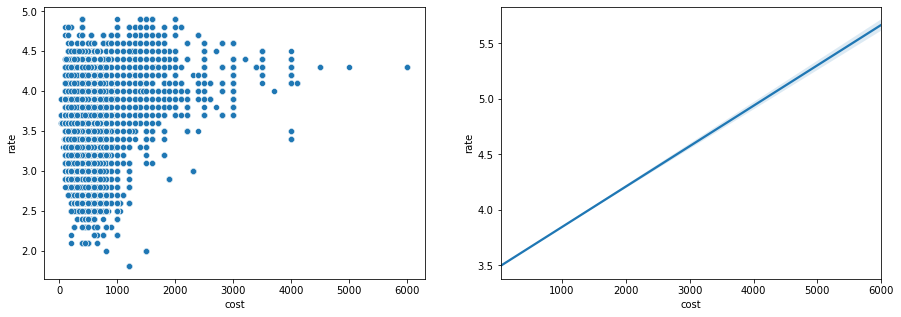

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="cost", y="rate", data=df)

plt.subplot(1, 2, 2)
sns.regplot(x="cost", y="rate", data=df,scatter=False)
plt.show()

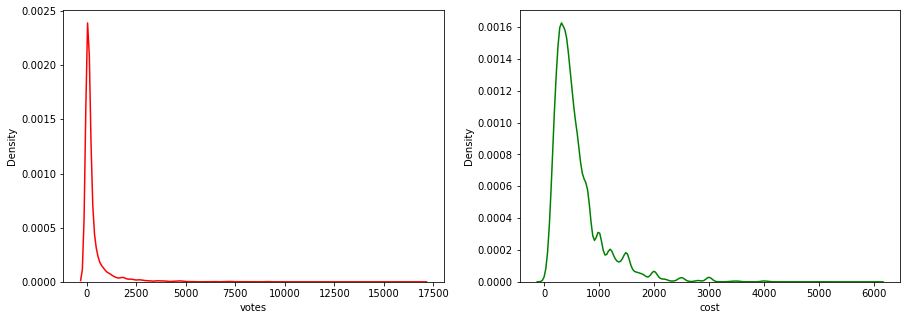

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.kdeplot(x='votes',data=df,color='r')

plt.subplot(1, 2, 2)
sns.kdeplot(x='cost',data=df,color='g')
plt.show()

In [59]:
print(df.votes.skew())
print(df.cost.skew())

6.886122853102463
2.4362525138091007


In [55]:
df.loc[:,['cost','votes']].describe()

,cost,votes
count,41182.000000,41182.000000
mean,603.601234,352.118377
std,464.678441,883.538292
min,40.000000,0.000000
25%,300.000000,21.000000
50%,500.000000,73.000000
75%,750.000000,277.000000
max,6000.000000,16832.000000


<h5>checking correlation

<AxesSubplot:>

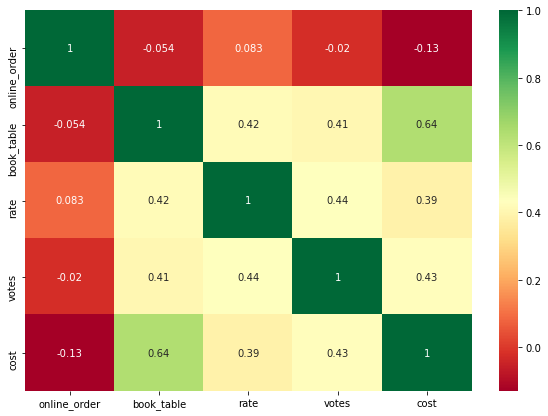

In [98]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [97]:
df.corr()['rate'].sort_values(ascending=False)

rate            1.000000
votes           0.434759
book_table      0.425494
cost            0.384489
online_order    0.069280
Name: rate, dtype: float64